In [96]:
# 1. Importar Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [97]:
# 2. Importar Dataset

df_exp = pd.read_csv("ExportacionesAño2023.csv", encoding="ISO-8859-1", sep=";")

In [98]:
# 3. Asignar nuevos nombres a columnas de Dataframe

columnas = [
    'año', 'mes', 'region', 'pais_destino', 'via_transporte',
    'puerto_embarque', 'aduana', 'sector', 'clasificacion', 'producto',
    'cod_arancelario', 'monto_fob_usd', 'peso_en_toneladas', 'tipo_operacion'
]

df_exp.columns = columnas

print(df_exp.columns)

Index(['año', 'mes', 'region', 'pais_destino', 'via_transporte',
       'puerto_embarque', 'aduana', 'sector', 'clasificacion', 'producto',
       'cod_arancelario', 'monto_fob_usd', 'peso_en_toneladas',
       'tipo_operacion'],
      dtype='object')


In [99]:
# 4. Chequear primeras 10 columnas

print(df_exp.head())

    año    mes       region    pais_destino                via_transporte  \
0  2023  Enero  Antofagasta        Alemania  Marítima, Fluvial y Lacustre   
1  2023  Enero  Antofagasta        Alemania  Marítima, Fluvial y Lacustre   
2  2023  Enero  Antofagasta  Arabia Saudita  Marítima, Fluvial y Lacustre   
3  2023  Enero  Antofagasta       Argentina           Carretero/Terrestre   
4  2023  Enero  Antofagasta       Argentina           Carretero/Terrestre   

  puerto_embarque       aduana     sector               clasificacion  \
0     Antofagasta  Antofagasta     Minero                     Minería   
1  Puerto Angamos  Antofagasta     Minero                     Minería   
2     Antofagasta  Antofagasta  No minero  Otros productos relevantes   
3            Jama  Antofagasta     Minero                     Minería   
4            Jama  Antofagasta     Minero                     Minería   

        producto  cod_arancelario monto_fob_usd peso_en_toneladas  \
0          Cobre         7403

In [100]:
# 5. Chequear ultimas 10 columnas

print(df_exp.tail())

         año        mes      region pais_destino  \
317195  2023  Diciembre  Valparaíso      Vietnam   
317196  2023  Diciembre  Valparaíso      Vietnam   
317197  2023  Diciembre  Valparaíso      Vietnam   
317198  2023  Diciembre  Valparaíso      Vietnam   
317199  2023  Diciembre  Valparaíso      Vietnam   

                      via_transporte puerto_embarque      aduana     sector  \
317195  Marítima, Fluvial y Lacustre      Valparaíso  Valparaíso  No minero   
317196  Marítima, Fluvial y Lacustre      Valparaíso  Valparaíso  No minero   
317197  Marítima, Fluvial y Lacustre      Valparaíso  Valparaíso  No minero   
317198  Marítima, Fluvial y Lacustre      Valparaíso  Valparaíso  No minero   
317199  Marítima, Fluvial y Lacustre      Valparaíso  Valparaíso  No minero   

       clasificacion producto  cod_arancelario monto_fob_usd  \
317195  Vitivinícola    Vinos         22042168       1.662,1   
317196  Vitivinícola    Vinos         22042168      11.817,0   
317197  Vitivinícola

In [101]:
# 6. Consultar tipo de datos

print(df_exp.dtypes)

año                   int64
mes                  object
region               object
pais_destino         object
via_transporte       object
puerto_embarque      object
aduana               object
sector               object
clasificacion        object
producto             object
cod_arancelario       int64
monto_fob_usd        object
peso_en_toneladas    object
tipo_operacion       object
dtype: object


In [102]:
# 7. Cambiar tipo de datos

df_exp['cod_arancelario'] = df_exp['cod_arancelario'].astype(str)

In [103]:
# 8. Cambiar tipo de datos

df_exp['monto_fob_usd'] = df_exp['monto_fob_usd'].replace({'\.': '', ',': '.'}, regex=True)

df_exp['monto_fob_usd'] = df_exp['monto_fob_usd'].astype(float)

In [104]:
# 9. Eliminar los puntos como separadores de miles y sustituir coma por punto.

df_exp['monto_fob_usd'] = df_exp['monto_fob_usd'].replace({r'\.': '', ',': '.'}, regex=True).astype('float32')
df_exp['peso_en_toneladas'] = df_exp['peso_en_toneladas'].replace({r'\.': '', ',': '.'}, regex=True).astype('float32')


In [105]:
# 10. Verificar Cambio

print(df_exp[['monto_fob_usd', 'peso_en_toneladas']].dtypes)

monto_fob_usd        float32
peso_en_toneladas    float32
dtype: object


In [106]:
# 11. Estadistica descriptiva

df_exp[['monto_fob_usd', 'peso_en_toneladas']].describe()

,monto_fob_usd,peso_en_toneladas
count,3.172000e+05,316025.000000
mean,3.012052e+05,204.308853
std,4.333386e+06,5452.550781
min,-1.204397e+05,-32.599998
25%,2.112975e+03,0.100000
50%,1.490015e+04,3.900000
75%,6.759218e+04,24.799999
max,7.401261e+08,969897.000000


In [107]:
# 12. abreviación numerica
def abreviacion_numerica(valor):
    if valor >= 1_000_000:
        return f"{valor / 1_000_000:.2f} M"
    elif valor >= 1_000:
        return f"{valor / 1_000:.2f} K"
    else:
        return f"{valor:.2f}"

In [108]:
# 12. Agrupar los datos por país de destino y calcular las métricas
# Agrupar los datos por país de destino y calcular las métricas
total_por_pais = df_exp.groupby('pais_destino').agg(
    Cantidad_Exportaciones=('pais_destino', 'size'),  # Contar el número de exportaciones
    Monto_FOB_Total=('monto_fob_usd', 'sum')         # Sumar el monto FOB total
).reset_index()

# Ordenar los resultados por Monto_FOB_Total de mayor a menor
total_por_pais = total_por_pais.sort_values(by='Monto_FOB_Total', ascending=False)


# Aplicar la función de formato a la columna Monto_FOB_Total
total_por_pais['Monto_FOB_Total'] = total_por_pais['Monto_FOB_Total'].apply(abreviacion_numerica)

# Seleccionar los 12 principales países
top_12_paises = total_por_pais.head(12)

# Mostrar el resultado en formato tabular
from tabulate import tabulate
print(tabulate(top_12_paises, headers='keys', tablefmt='fancy_grid', showindex=False, colalign=("left", "right", "right")))

╒═══════════════════════════╤══════════════════════════╤═══════════════════╕
│ pais_destino              │   Cantidad_Exportaciones │   Monto_FOB_Total │
╞═══════════════════════════╪══════════════════════════╪═══════════════════╡
│ China                     │                    17647 │        35939.50 M │
├───────────────────────────┼──────────────────────────┼───────────────────┤
│ Estados Unidos de América │                    47567 │        15427.87 M │
├───────────────────────────┼──────────────────────────┼───────────────────┤
│ Japón                     │                    10534 │         6713.10 M │
├───────────────────────────┼──────────────────────────┼───────────────────┤
│ Corea del Sur             │                     6099 │         5759.27 M │
├───────────────────────────┼──────────────────────────┼───────────────────┤
│ Brasil                    │                    17966 │         4351.73 M │
├───────────────────────────┼──────────────────────────┼───────────────────┤

           mes Monto_FOB_Total
3        Enero       9786.04 M
4      Febrero       7595.55 M
7        Marzo       8688.70 M
0        Abril       7979.67 M
8         Mayo       8809.94 M
6        Junio       7041.95 M
5        Julio       7628.44 M
1       Agosto       7485.76 M
11  Septiembre       6724.84 M
10     Octubre       7823.02 M
9    Noviembre       8626.37 M
2    Diciembre       7352.00 M


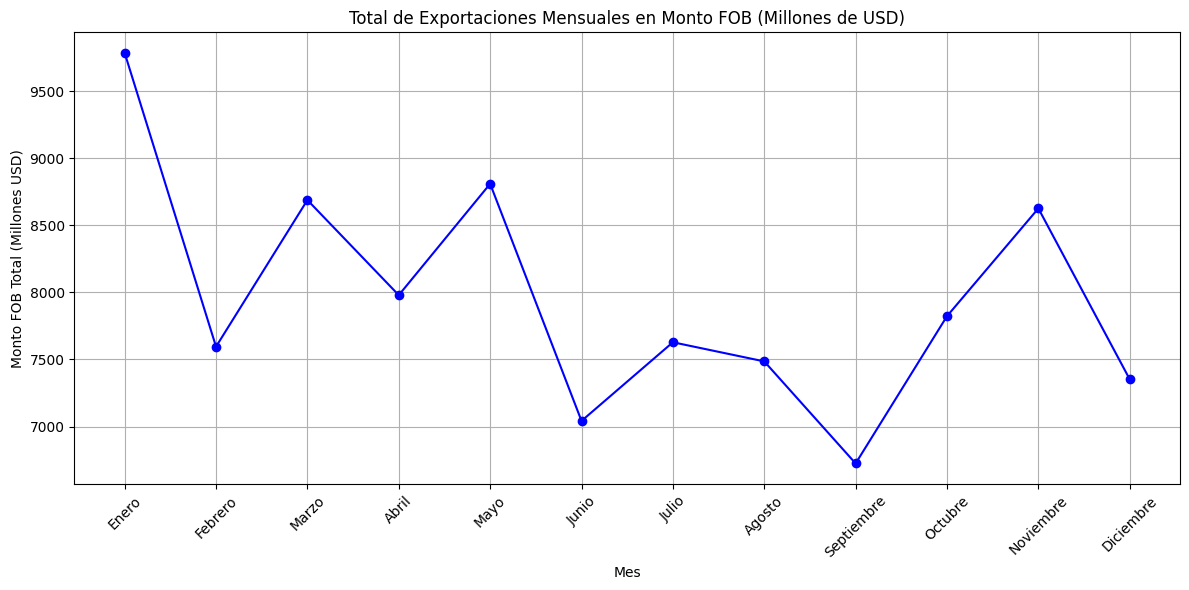

In [109]:
# 13. CONTEO DE EXPORTACIONES POR REGIÓN. 

orden_meses = [
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
]

# Agrupar las exportaciones por mes y calcular el monto total
exportaciones_por_mes = df_exp.groupby('mes', observed=False)['monto_fob_usd'].sum().reset_index()
exportaciones_por_mes.rename(columns={'monto_fob_usd': 'Monto_FOB_Total'}, inplace=True)

# Convertir los montos a millones y formatearlos como texto
exportaciones_por_mes['Monto_FOB_Total'] = exportaciones_por_mes['Monto_FOB_Total'].apply(abreviacion_numerica)

# Convertir la columna 'mes' en categórica con el orden definido
exportaciones_por_mes['mes'] = pd.Categorical(
    exportaciones_por_mes['mes'], 
    categories=orden_meses, 
    ordered=True
)

# Ordenar el DataFrame según el orden de los meses
exportaciones_por_mes = exportaciones_por_mes.sort_values(by='mes')

# Mostrar el resultado ordenado
print(exportaciones_por_mes)

# Gráfico de línea (usando valores numéricos en millones para el gráfico)
valores_millones = df_exp.groupby('mes', observed=False)['monto_fob_usd'].sum().reset_index()
valores_millones['Monto_FOB_Total'] = valores_millones['monto_fob_usd'] / 1_000_000
valores_millones['mes'] = pd.Categorical(
    valores_millones['mes'], 
    categories=orden_meses, 
    ordered=True
)
valores_millones = valores_millones.sort_values(by='mes')

plt.figure(figsize=(12, 6))
plt.plot(valores_millones['mes'], valores_millones['Monto_FOB_Total'], marker='o', linestyle='-', color='b')

# Agregar títulos y etiquetas
plt.title('Total de Exportaciones Mensuales en Monto FOB (Millones de USD)')
plt.xlabel('Mes')
plt.ylabel('Monto FOB Total (Millones USD)')
plt.xticks(rotation=45)  # Rotar los nombres de los meses

# Mostrar el gráfico
plt.grid(True)  # Agrega una cuadrícula para mejor visualización
plt.tight_layout()
plt.show()

In [110]:
# 14. Conteo de exportaciones por región de origen
# Agrupar los datos por región de origen y calcular las métricas
exportaciones_por_region = df_exp.groupby('region').agg(
    Monto_FOB_Total=('monto_fob_usd', 'sum'),
    Cantidad_Exportaciones=('region', 'size'),
    Peso_Total_Toneladas=('peso_en_toneladas', 'sum')
).reset_index()

# Crear una columna numérica para Monto FOB por tonelada
exportaciones_por_region['Monto_FOB_por_Tonelada'] = (
    exportaciones_por_region['Monto_FOB_Total'] / exportaciones_por_region['Peso_Total_Toneladas']
)

# Ordenar por Monto_FOB_Total antes de formatear
exportaciones_por_region = exportaciones_por_region.sort_values(
    by='Monto_FOB_Total', ascending=False
)

# Aplicar formato a las columnas numéricas
exportaciones_por_region['Monto_FOB_Total'] = exportaciones_por_region['Monto_FOB_Total'].apply(abreviacion_numerica)
exportaciones_por_region['Peso_Total_Toneladas'] = exportaciones_por_region['Peso_Total_Toneladas'].apply(abreviacion_numerica)
exportaciones_por_region['Monto_FOB_por_Tonelada'] = exportaciones_por_region['Monto_FOB_por_Tonelada'].apply(abreviacion_numerica)

# Seleccionar solo las primeras 10 regiones
top_regiones = exportaciones_por_region.head(10)

# Mostrar el resultado en formato tabulado
print(tabulate(top_regiones, headers='keys', tablefmt='fancy_grid', showindex=False, 
               colalign=("left", "right", "right", "right", "right")))

╒═══════════════════════════════════╤═══════════════════╤══════════════════════════╤════════════════════════╤══════════════════════════╕
│ region                            │   Monto_FOB_Total │   Cantidad_Exportaciones │   Peso_Total_Toneladas │   Monto_FOB_por_Tonelada │
╞═══════════════════════════════════╪═══════════════════╪══════════════════════════╪════════════════════════╪══════════════════════════╡
│ Antofagasta                       │        33868.77 M │                     4655 │                 9.28 M │                   3.65 K │
├───────────────────────────────────┼───────────────────┼──────────────────────────┼────────────────────────┼──────────────────────────┤
│ Valparaíso                        │        27153.84 M │                   186142 │                10.56 M │                   2.57 K │
├───────────────────────────────────┼───────────────────┼──────────────────────────┼────────────────────────┼──────────────────────────┤
│ Biobío                            │    

In [111]:
#15. 
# Agrupar los datos por mes y puerto de embarque, contar las exportaciones,
# y calcular la suma de monto_fob_usd y peso_en_toneladas
df_exp_grouped = df_exp.groupby(['mes', 'puerto_embarque'], observed=False).agg(
    exportaciones=('puerto_embarque', 'size'),    # Contar las exportaciones
    Monto_FOB_Total=('monto_fob_usd', 'sum'),     # Sumar monto FOB USD
    Peso_Total_Toneladas=('peso_en_toneladas', 'sum')  # Sumar el peso en toneladas
).reset_index()

# Identificar el puerto con el mayor monto FOB USD en cada mes
df_top_puertos = df_exp_grouped.loc[df_exp_grouped.groupby('mes', observed=False)['Monto_FOB_Total'].idxmax()]

# Ordenar por mes (ahora con el orden correcto)
df_top_puertos_sorted = df_top_puertos.sort_values(
    by='mes', 
    key=lambda x: pd.Categorical(x, categories=orden_meses, ordered=True)
)

# Formatear Monto_FOB_Total a millones con sufijo "M"
df_top_puertos_sorted['Monto_FOB_Total'] = df_top_puertos_sorted['Monto_FOB_Total'].apply(abreviacion_numerica)

# Formatear Peso_Total_Toneladas a miles con sufijo "K"
df_top_puertos_sorted['Peso_Total_Toneladas'] = df_top_puertos_sorted['Peso_Total_Toneladas'].apply(abreviacion_numerica)

# Mostrar el resultado en formato tabulado
print(tabulate(df_top_puertos_sorted, headers='keys', tablefmt='fancy_grid', showindex=False, colalign=("left", "left", "right", "right", "right")))

╒════════════╤═══════════════════╤═════════════════╤═══════════════════╤════════════════════════╕
│ mes        │ puerto_embarque   │   exportaciones │   Monto_FOB_Total │   Peso_Total_Toneladas │
╞════════════╪═══════════════════╪═════════════════╪═══════════════════╪════════════════════════╡
│ Enero      │ San Antonio       │            8268 │         1843.66 M │               506.93 K │
├────────────┼───────────────────┼─────────────────┼───────────────────┼────────────────────────┤
│ Febrero    │ Puerto Angamos    │             112 │         1371.81 M │               151.44 K │
├────────────┼───────────────────┼─────────────────┼───────────────────┼────────────────────────┤
│ Marzo      │ Puerto Angamos    │             135 │         1770.36 M │               218.20 K │
├────────────┼───────────────────┼─────────────────┼───────────────────┼────────────────────────┤
│ Abril      │ Puerto Angamos    │             125 │         1606.80 M │               217.10 K │
├────────────┼──────

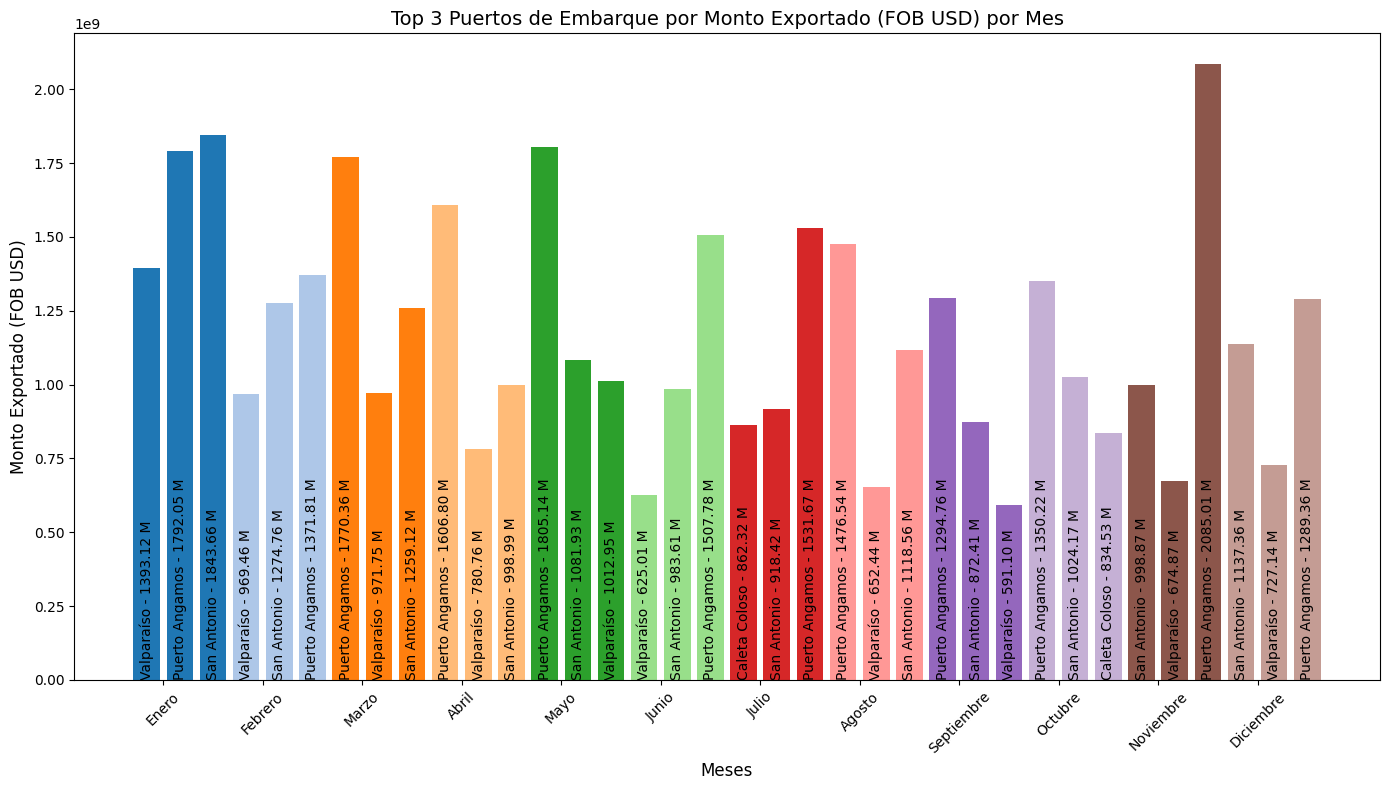

In [112]:
# 16. Top 3 Puertos de Embarque por Monto Exportado (FOB USD) por Mes

# Agrupar los datos por mes y puerto, y luego sumar las exportaciones por monto_fob_usd
top_puertos_por_mes = df_exp.groupby(['mes', 'puerto_embarque'], observed=False)['monto_fob_usd'].sum().reset_index()

# Obtener los 3 puertos con mayor monto de exportación por mes y ordenar por monto_fob_usd dentro de cada mes
top_3_puertos_por_mes = top_puertos_por_mes.sort_values(['mes', 'monto_fob_usd'], ascending=[True, False]) \
    .groupby('mes', observed=False).head(3).reset_index(drop=True)

# Convertir la columna 'mes' a categórica con el orden especificado
top_3_puertos_por_mes['mes'] = pd.Categorical(top_3_puertos_por_mes['mes'], categories=orden_meses, ordered=True)

# Ordenar los datos por mes
top_3_puertos_por_mes = top_3_puertos_por_mes.sort_values(by='mes')

# Crear el gráfico
plt.figure(figsize=(14, 8))

# Colores personalizados para las barras
colors = plt.cm.tab20.colors

# Configurar las posiciones en el eje X para cada barra (se separan por meses)
x_offset = 0
for idx, mes in enumerate(top_3_puertos_por_mes['mes'].unique()):
    data_mes = top_3_puertos_por_mes[top_3_puertos_por_mes['mes'] == mes]
    
    # Generar las posiciones para las barras
    x_positions = [i + x_offset for i in range(len(data_mes))]
    
    # Graficar las barras
    plt.bar(x_positions, data_mes['monto_fob_usd'], color=colors[idx % len(colors)], label=f'{mes}')
    
    # Añadir las etiquetas de los puertos y los montos dentro de las barras de forma vertical
    for x, monto, puerto in zip(x_positions, data_mes['monto_fob_usd'], data_mes['puerto_embarque']):
        # Abreviar el monto usando la función abreviacion_numerica
        monto_abreviado = abreviacion_numerica(monto)
        plt.text(x, 0, f'{puerto} - {monto_abreviado}', ha='center', va='bottom', fontsize=10, color='black', rotation=90)

    # Aumentar el desplazamiento para las barras del siguiente mes
    x_offset += len(data_mes)  # Desplazamiento para no superponer barras

plt.title("Top 3 Puertos de Embarque por Monto Exportado (FOB USD) por Mes", fontsize=14)
plt.xlabel("Meses", fontsize=12)
plt.ylabel("Monto Exportado (FOB USD)", fontsize=12)

# Ordenar los meses según la lista 'orden_meses'
month_labels = sorted(top_3_puertos_por_mes['mes'].unique(), key=lambda mes: orden_meses.index(mes))

# Configurar las posiciones de las etiquetas en el eje X
x_tick_positions = [i + 0.5 for i in range(0, x_offset, 3)]  # Posiciones de los meses
plt.xticks(x_tick_positions, month_labels, rotation=45)

plt.tight_layout()
plt.show()

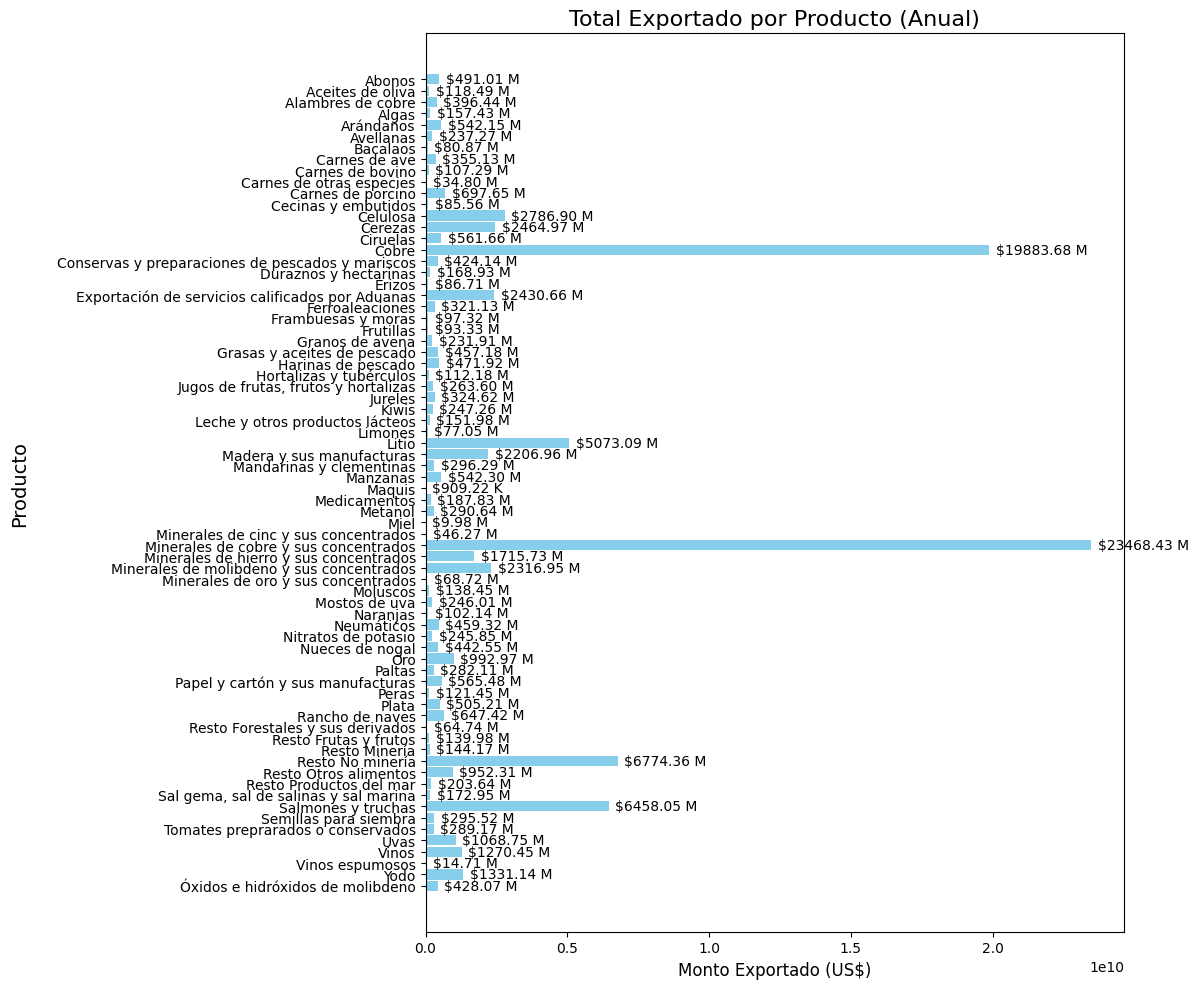

In [113]:
# 17. Grafico de total exportado por producto en USD

df_exp_annual = df_exp.groupby(['producto'])['monto_fob_usd'].sum().reset_index(name='exportaciones_anuales')

df_exp_annual = df_exp_annual.sort_values(by='producto', ascending=False)

plt.figure(figsize=(12, 10))

plt.barh(df_exp_annual['producto'], df_exp_annual['exportaciones_anuales'], color='skyblue', height=0.9)

# Añadir las etiquetas con la función abreviacion_numerica
for index, value in enumerate(df_exp_annual['exportaciones_anuales']):
    valor_abreviado = abreviacion_numerica(value)
    plt.text(value + (0.01 * df_exp_annual['exportaciones_anuales'].max()), index, f"${valor_abreviado}", 
             va='center', fontsize=10)

# Configurar títulos y etiquetas
plt.title('Total Exportado por Producto (Anual)', fontsize=16)
plt.xlabel('Monto Exportado (US$)', fontsize=12)
plt.ylabel('Producto', fontsize=14, labelpad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()

# Mostrar el gráfico
plt.show()

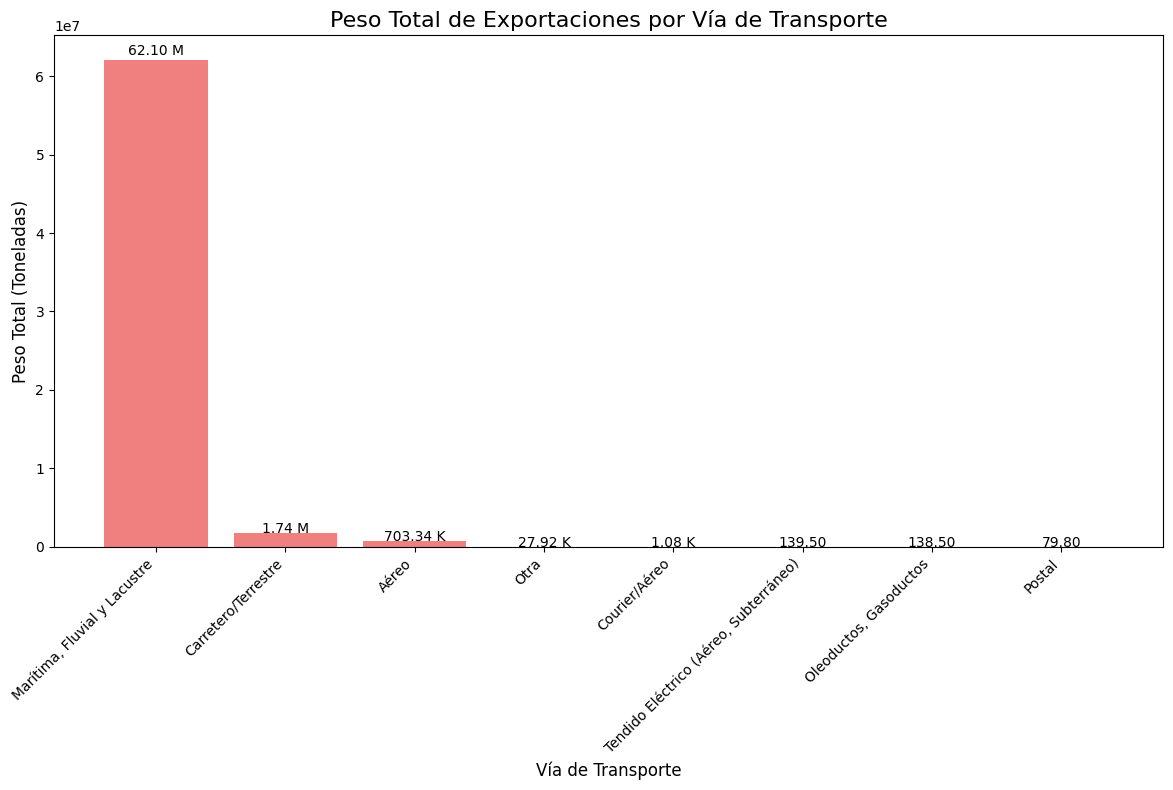

In [114]:
# 18. Cantidad de exportaciones según via de transporte en peso

# Elaboración de dataframe
df_via_transporte = df_exp.groupby('via_transporte')['peso_en_toneladas'].sum().reset_index(name='peso_total')

# Ordenar el dataframe
df_via_transporte = df_via_transporte.sort_values(by='peso_total', ascending=False)


df_via_transporte['peso_formateado'] = df_via_transporte['peso_total'].apply(abreviacion_numerica)

# Gráfico de barras: Peso total según vía de transporte
plt.figure(figsize=(12, 8))

plt.bar(df_via_transporte['via_transporte'], df_via_transporte['peso_total'], color='lightcoral')

# Anotaciones en el gráfico con el peso formateado
for index, value in enumerate(df_via_transporte['peso_total']):
    plt.text(index, value + (value * 0.01), abreviacion_numerica(value), ha='center', fontsize=10)

# Títulos y etiquetas
plt.title('Peso Total de Exportaciones por Vía de Transporte', fontsize=16)
plt.xlabel('Vía de Transporte', fontsize=12)
plt.ylabel('Peso Total (Toneladas)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

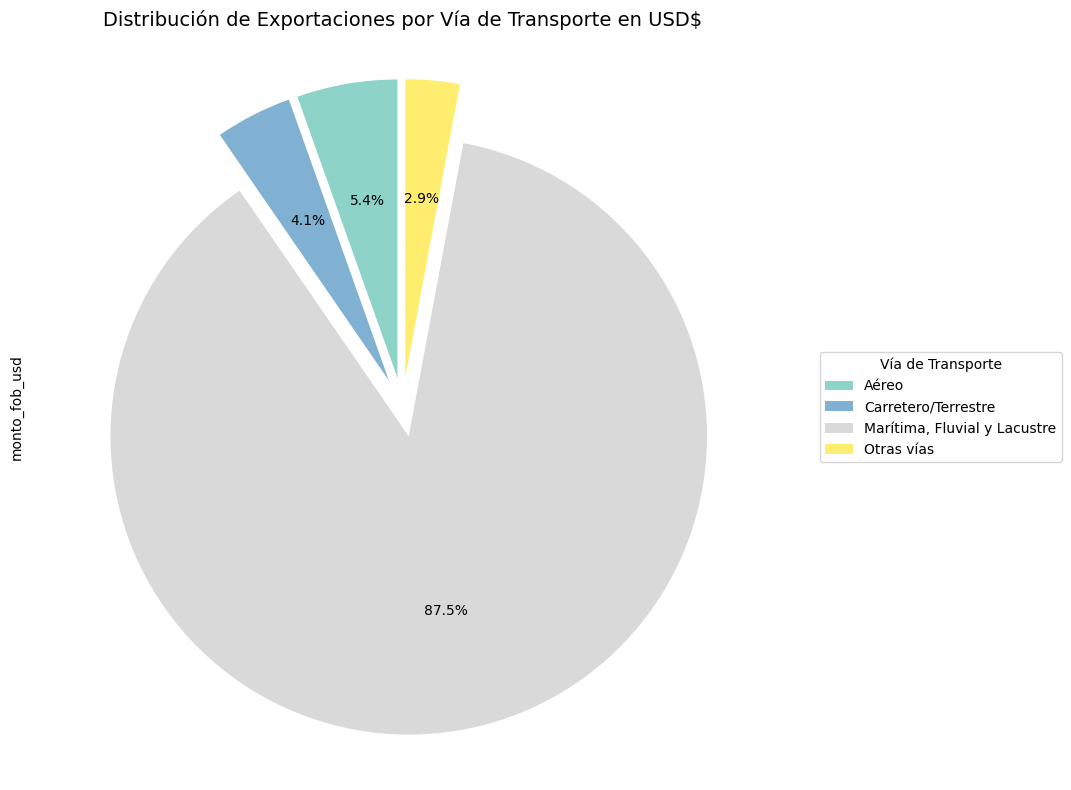

In [115]:
# 19. Distribución de Exportaciones por Vía de Transporte 
exportaciones_por_via = df_exp.groupby('via_transporte')['monto_fob_usd'].sum()
porcentaje = (exportaciones_por_via / exportaciones_por_via.sum()) * 100

# Reemplazar categorías menores al 4% por "Otras vías"
exportaciones_por_via_agrupadas = exportaciones_por_via[porcentaje >= 4]
exportaciones_por_via_agrupadas['Otras vías'] = exportaciones_por_via[porcentaje < 4].sum()

plt.figure(figsize=(10, 8))
ax = exportaciones_por_via_agrupadas.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=90, 
    cmap='Set3', 
    labels=None, 
    explode=[0.1]*len(exportaciones_por_via_agrupadas)
)

plt.title('Distribución de Exportaciones por Vía de Transporte en USD$', fontsize=14)
plt.legend(
    title='Vía de Transporte', 
    labels=exportaciones_por_via_agrupadas.index, 
    bbox_to_anchor=(1.05, 0.5), 
    loc='center left'
)

plt.tight_layout()
plt.show()

In [116]:
# 20. Productos Exportados por vía maritima (Cantidad de Exportaciones)

# Filtrar las exportaciones con 'Marítima, Fluvial y Lacustre' como vía de transporte
df_maritimo = df_exp[df_exp['via_transporte'].str.contains('Marítima, Fluvial y Lacustre', case=False, na=False)]

# Agrupar por 'producto' y calcular las métricas
df_productos_maritimo = df_maritimo.groupby('producto', as_index=False).agg(
    cantidad_exportaciones=('producto', 'size'),
    monto_fob_total=('monto_fob_usd', 'sum'),
    peso_total=('peso_en_toneladas', 'sum'),
)

# Ordenar por monto FOB total en orden descendente
df_productos_maritimo = df_productos_maritimo.sort_values(by='monto_fob_total', ascending=False)

# Formatear las columnas numéricas
df_productos_maritimo['monto_fob_total'] = df_productos_maritimo['monto_fob_total'].apply(abreviacion_numerica)
df_productos_maritimo['peso_total'] = df_productos_maritimo['peso_total'].apply(abreviacion_numerica)

# Seleccionar los 10 productos principales
top_productos_x_mar = df_productos_maritimo.head(10)

# Mostrar el resultado con formato tabulado
print(tabulate(top_productos_x_mar, headers='keys', tablefmt='fancy_grid', showindex=False, colalign=("left", "right", "right", "right")))



╒═══════════════════════════════════════════╤══════════════════════════╤═══════════════════╤══════════════╕
│ producto                                  │   cantidad_exportaciones │   monto_fob_total │   peso_total │
╞═══════════════════════════════════════════╪══════════════════════════╪═══════════════════╪══════════════╡
│ Minerales de cobre y sus concentrados     │                      400 │        23468.42 M │      11.85 M │
├───────────────────────────────────────────┼──────────────────────────┼───────────────────┼──────────────┤
│ Cobre                                     │                     2054 │        19619.49 M │       2.33 M │
├───────────────────────────────────────────┼──────────────────────────┼───────────────────┼──────────────┤
│ Litio                                     │                      633 │         5021.33 M │     215.60 K │
├───────────────────────────────────────────┼──────────────────────────┼───────────────────┼──────────────┤
│ Resto No minería          

In [117]:
# 21. Productos Exportados por vía aéreo (Cantidad de Exportaciones)

# Filtrar las exportaciones con 'aéreo' como vía de transporte
df_aereo = df_exp[df_exp['via_transporte'].str.contains('Aéreo', case=False, na=False)]

# Agrupar por 'producto' y calcular peso total, monto FOB total y cantidad de exportaciones
df_productos_aereo = df_aereo.groupby('producto', as_index=False).agg(
    cantidad_exportaciones=('producto', 'size'),
    monto_fob_total=('monto_fob_usd', 'sum'),
    peso_total=('peso_en_toneladas', 'sum'),
)

# Ordenar el DataFrame por el monto FOB total en orden descendente
df_productos_aereo = df_productos_aereo.sort_values(by='monto_fob_total', ascending=False)

# Formatear las columnas numéricas
df_productos_aereo['monto_fob_total'] = df_productos_aereo['monto_fob_total'].apply(abreviacion_numerica)
df_productos_aereo['peso_total'] = df_productos_aereo['peso_total'].apply(abreviacion_numerica)

# Mostrar el resultado ordenado
top_productos_x_aire = df_productos_aereo.head(10)

print(tabulate(top_productos_x_aire, headers='keys', tablefmt='fancy_grid', showindex=False, colalign=("left", "right", "right", "right")))

╒═══════════════════════╤══════════════════════════╤═══════════════════╤══════════════╕
│ producto              │   cantidad_exportaciones │   monto_fob_total │   peso_total │
╞═══════════════════════╪══════════════════════════╪═══════════════════╪══════════════╡
│ Salmones y truchas    │                     3861 │         1981.55 M │     196.16 K │
├───────────────────────┼──────────────────────────┼───────────────────┼──────────────┤
│ Oro                   │                       87 │          992.97 M │       259.70 │
├───────────────────────┼──────────────────────────┼───────────────────┼──────────────┤
│ Resto No minería      │                    48933 │          730.54 M │      15.01 K │
├───────────────────────┼──────────────────────────┼───────────────────┼──────────────┤
│ Plata                 │                       69 │          504.95 M │       494.20 │
├───────────────────────┼──────────────────────────┼───────────────────┼──────────────┤
│ Rancho de naves       │       

In [118]:
# 22. Productos Exportados por vía terrestre (Cantidad de Exportaciones)

# Filtrar las exportaciones con 'carretero' como vía de transporte
df_terrestre = df_exp[df_exp['via_transporte'].str.contains('carretero', case=False, na=False)]

# Agrupar por 'producto' y calcular peso total, monto FOB total y cantidad de exportaciones
df_productos_terrestre  = df_terrestre .groupby('producto', as_index=False).agg(
    cantidad_exportaciones=('producto', 'size'),
    monto_fob_total=('monto_fob_usd', 'sum'),
    peso_total=('peso_en_toneladas', 'sum'),
)

# Ordenar el DataFrame por el monto FOB total en orden descendente
df_productos_terrestre  = df_productos_terrestre .sort_values(by='monto_fob_total', ascending=False)

df_productos_terrestre['monto_fob_total'] = df_productos_terrestre['monto_fob_total'].apply(abreviacion_numerica)
df_productos_terrestre['peso_total'] = df_productos_terrestre['peso_total'].apply(abreviacion_numerica)

# Mostrar el resultado ordenado
top_productos_x_tierra = df_productos_terrestre .head(10)

print(tabulate(top_productos_x_tierra, headers='keys', tablefmt='fancy_grid', showindex=False, colalign=("left", "right", "right", "right")))

╒═══════════════════════════════════════════╤══════════════════════════╤═══════════════════╤══════════════╕
│ producto                                  │   cantidad_exportaciones │   monto_fob_total │   peso_total │
╞═══════════════════════════════════════════╪══════════════════════════╪═══════════════════╪══════════════╡
│ Resto No minería                          │                    30257 │         1614.60 M │     919.71 K │
├───────────────────────────────────────────┼──────────────────────────┼───────────────────┼──────────────┤
│ Salmones y truchas                        │                     1673 │         1122.78 M │     167.57 K │
├───────────────────────────────────────────┼──────────────────────────┼───────────────────┼──────────────┤
│ Resto Otros alimentos                     │                     2959 │          164.91 M │      48.82 K │
├───────────────────────────────────────────┼──────────────────────────┼───────────────────┼──────────────┤
│ Vinos                     

In [119]:
# 23. Exportaciones por Producto desde los Puertos de Coquimbo y Guayacán: Cantidad y Monto FOB Total

df_puertos_filtrados = df_exp[df_exp['puerto_embarque'].isin(['Coquimbo', 'Guayacán'])]

df_productos_por_puerto = df_puertos_filtrados.groupby(['puerto_embarque', 'producto']).agg(
    Cantidad_Exportaciones=('producto', 'size'),
    Monto_FOB_Total=('monto_fob_usd', 'sum')
).reset_index()

df_productos_por_puerto_ordenado = df_productos_por_puerto.sort_values(by='Monto_FOB_Total', ascending=False)

df_productos_por_puerto_ordenado['Monto_FOB_Total'] = df_productos_por_puerto_ordenado['Monto_FOB_Total'].apply(abreviacion_numerica)

print(tabulate(df_productos_por_puerto_ordenado, headers='keys', tablefmt='fancy_grid', showindex=False, colalign=("left", "left", "right", "right")))

╒═══════════════════╤════════════════════════════════════════╤══════════════════════════╤═══════════════════╕
│ puerto_embarque   │ producto                               │   Cantidad_Exportaciones │   Monto_FOB_Total │
╞═══════════════════╪════════════════════════════════════════╪══════════════════════════╪═══════════════════╡
│ Coquimbo          │ Minerales de cobre y sus concentrados  │                       39 │          869.65 M │
├───────────────────┼────────────────────────────────────────┼──────────────────────────┼───────────────────┤
│ Guayacán          │ Minerales de hierro y sus concentrados │                       15 │          203.84 M │
├───────────────────┼────────────────────────────────────────┼──────────────────────────┼───────────────────┤
│ Coquimbo          │ Uvas                                   │                      654 │          100.29 M │
├───────────────────┼────────────────────────────────────────┼──────────────────────────┼───────────────────┤
│ Coquimbo

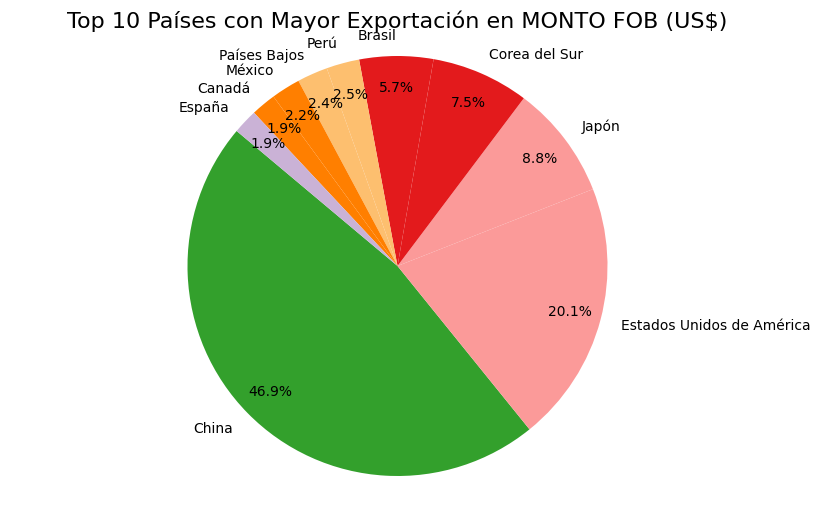

In [120]:
# 24. Top 10 Países Destino con Mayor Exportación en Monto FOB (US$)

df_paises_exportacion = df_exp.groupby('pais_destino')['monto_fob_usd'].sum().reset_index()

df_top_paises = df_paises_exportacion.sort_values(by='monto_fob_usd', ascending=False).head(10)

colors = plt.cm.Paired(np.linspace(0.3, 0.7, 10))

plt.figure(figsize=(10, 6))
plt.pie(df_top_paises['monto_fob_usd'],
        labels=df_top_paises['pais_destino'],
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        pctdistance=0.85)  # Aumenta este valor para alejar más los porcentajes

plt.title('Top 10 Países con Mayor Exportación en MONTO FOB (US$)', fontsize=16)

plt.axis('equal')
plt.show()

In [121]:
# 25. Top 10 de Productos Principales por Monto FOB en USD
# Calcular las métricas
totales_por_codigo = df_exp.groupby('cod_arancelario')['monto_fob_usd'].sum().reset_index(name='Suma_Monto_FOB')
promedios_por_codigo = df_exp.groupby('cod_arancelario')['monto_fob_usd'].mean().reset_index(name='Promedio_Monto_FOB')
exportaciones_por_codigo = df_exp['cod_arancelario'].value_counts().reset_index()
exportaciones_por_codigo.columns = ['cod_arancelario', 'Cantidad_Exportaciones']

# Obtener los productos asociados a cada código arancelario (tomamos el primer producto para cada código)
productos_por_codigo = df_exp.groupby('cod_arancelario')['producto'].first().reset_index(name='Producto')

# Combinar todas las métricas en un solo DataFrame
tabla_resumen = totales_por_codigo.merge(promedios_por_codigo, on='cod_arancelario')
tabla_resumen = tabla_resumen.merge(exportaciones_por_codigo, on='cod_arancelario')
tabla_resumen = tabla_resumen.merge(productos_por_codigo, on='cod_arancelario')

# Reordenar las columnas
tabla_resumen = tabla_resumen[['cod_arancelario', 'Producto', 'Suma_Monto_FOB', 'Cantidad_Exportaciones', 'Promedio_Monto_FOB']]

# Ordenar por la suma del monto FOB (de mayor a menor)
tabla_resumen = tabla_resumen.sort_values(by='Suma_Monto_FOB', ascending=False)

tabla_resumen['Promedio_Monto_FOB'] = tabla_resumen['Promedio_Monto_FOB'].apply(abreviacion_numerica)
tabla_resumen['Suma_Monto_FOB'] = tabla_resumen['Suma_Monto_FOB'].apply(abreviacion_numerica)

top_15_prod = tabla_resumen.head(15)

# Mostrar la tabla con tabulate
print(tabulate(top_15_prod, headers='keys', tablefmt='fancy_grid', showindex=False,colalign=("left", "left", "right", "right", "right")))

╒═══════════════════╤══════════════════════════════════════════════════╤══════════════════╤══════════════════════════╤══════════════════════╕
│ cod_arancelario   │ Producto                                         │   Suma_Monto_FOB │   Cantidad_Exportaciones │   Promedio_Monto_FOB │
╞═══════════════════╪══════════════════════════════════════════════════╪══════════════════╪══════════════════════════╪══════════════════════╡
│ 26030000          │ Minerales de cobre y sus concentrados            │       23468.43 M │                      414 │              56.69 M │
├───────────────────┼──────────────────────────────────────────────────┼──────────────────┼──────────────────────────┼──────────────────────┤
│ 74031100          │ Cobre                                            │       17375.67 M │                     1419 │              12.25 M │
├───────────────────┼──────────────────────────────────────────────────┼──────────────────┼──────────────────────────┼──────────────────────┤
│ 2836

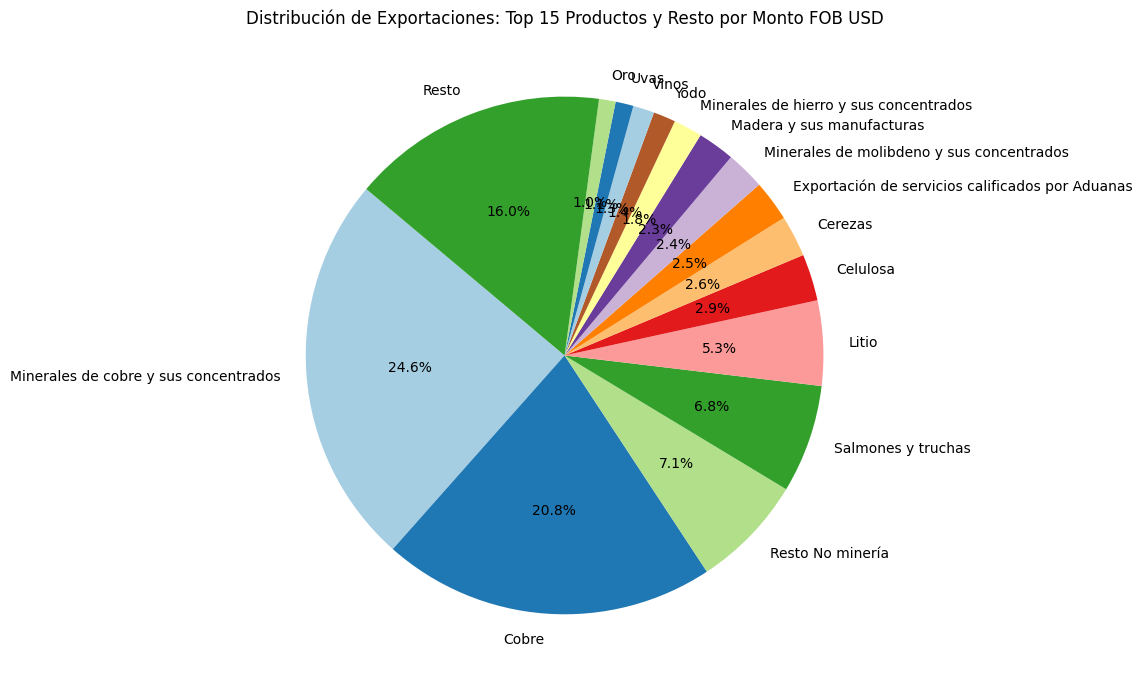

In [122]:
# 26. Ordenar los productos por monto FOB USD en orden descendente
df_exp_productos = df_exp.groupby('producto')['monto_fob_usd'].sum().sort_values(ascending=False)

# Seleccionar el top 15 productos y calcular el monto del resto
top_10_productos = df_exp_productos[:15]
resto = pd.Series(df_exp_productos[15:].sum(), index=['Resto'])

# Combinar el top 15 con el resto
top_10_con_resto = pd.concat([top_10_productos, resto])

# Crear el gráfico de torta
plt.figure(figsize=(10, 8))
plt.pie(top_10_con_resto, labels=top_10_con_resto.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Ajustes del gráfico
plt.title("Distribución de Exportaciones: Top 15 Productos y Resto por Monto FOB USD")
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [128]:
# 27. Crecimiento Mensual de las Exportaciones en Monto FOB (USD)

exportaciones_por_mes['mes_num'] = exportaciones_por_mes['mes'].apply(lambda x: orden_meses.index(x) + 1)

# Calcular el crecimiento porcentual mes a mes
exportaciones_por_mes['Crecimiento_Porcentual'] = exportaciones_por_mes['Monto_FOB_Total'].pct_change() * 100

# Gráfico de línea
plt.figure(figsize=(12, 6))

# Recorrer cada mes y graficar líneas con colores diferentes
for i in range(1, len(exportaciones_por_mes)):
    x_pos = (exportaciones_por_mes['mes_num'].iloc[i-1], exportaciones_por_mes['mes_num'].iloc[i])
    y_pos = (exportaciones_por_mes['Monto_FOB_Total'].iloc[i-1], exportaciones_por_mes['Monto_FOB_Total'].iloc[i])
    
    # Determinar el color de la línea: rojo si el crecimiento es negativo, verde si es positivo
    color = 'green' if exportaciones_por_mes['Crecimiento_Porcentual'].iloc[i] >= 0 else 'red'
    
    # Graficar la línea con el color determinado
    plt.plot(x_pos, y_pos, marker='o', linestyle='-', color=color)

    # Calcular el punto medio para colocar el texto
    mid_x = (x_pos[0] + x_pos[1]) / 2
    mid_y = (y_pos[0] + y_pos[1]) / 2
    # Agregar el texto sobre la línea
    plt.text(mid_x, mid_y, f"{exportaciones_por_mes['Crecimiento_Porcentual'].iloc[i]:.2f}%", 
             ha='center', va='bottom', fontsize=10, color='black')

# Configurar etiquetas y títulos
plt.title('Total de Exportaciones Mensuales en Monto FOB (USD) y Crecimiento Porcentual', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Monto FOB Total (USD)', fontsize=12)
plt.xticks(ticks=exportaciones_por_mes['mes_num'], labels=exportaciones_por_mes['mes'], rotation=45)  # Usar los nombres de los meses

# Cuadrícula con transparencia
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.3)  # Cuadrícula menos notoria (alpha=0.3 para transparencia)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Error in callback <function _draw_all_if_interactive at 0x000002AF0D3672E0> (for post_execute), with arguments args (),kwargs {}:


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<Figure size 1200x600 with 1 Axes>

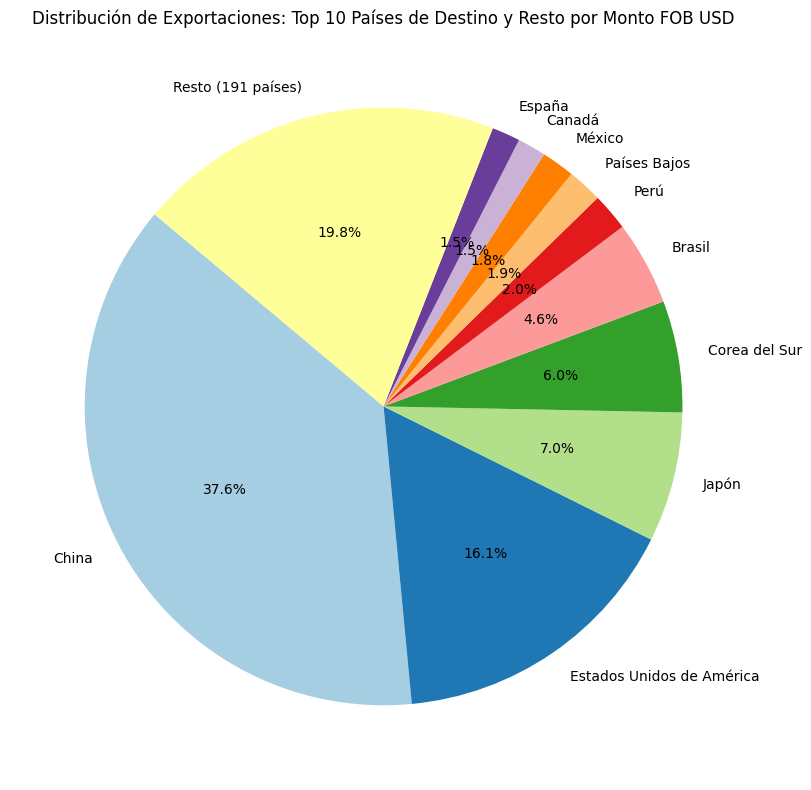

In [28]:
# 28. Ordenar los países de destino por monto FOB USD en orden descendente
df_exp_paises = df_exp.groupby('pais_destino')['monto_fob_usd'].sum().sort_values(ascending=False)

# Seleccionar el top 10 países y calcular el monto del resto
top_10_paises = df_exp_paises[:10]
resto_monto = df_exp_paises[10:].sum()
resto_paises = len(df_exp_paises[10:])  # Número de países en "Resto"

# Crear una serie que combine el top 10 con el resto (con etiqueta personalizada)
top_10_con_resto = pd.concat([top_10_paises, pd.Series(resto_monto, index=[f"Resto ({resto_paises} países)"])])

# Crear el gráfico de torta
plt.figure(figsize=(10, 8))
plt.pie(top_10_con_resto, labels=top_10_con_resto.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Ajustes del gráfico
plt.title("Distribución de Exportaciones: Top 10 Países de Destino y Resto por Monto FOB USD")
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [129]:
# 29. Promedio Ponderado del Monto FOB por País de Destino
# Total de monto FOB USD
total_fob = df_exp['monto_fob_usd'].sum()

# Calcular el peso de mercado
df_exp['peso_mercado'] = df_exp['monto_fob_usd'] / total_fob

# Calcular el promedio ponderado por país destino directamente con groupby y sum
promedio_ponderado = df_exp.groupby('pais_destino').apply(
    lambda x: (x['monto_fob_usd'] * x['peso_mercado']).sum()
)

# Ordenar el resultado
promedio_ponderado = promedio_ponderado.sort_values(ascending=False).reset_index(name='promedio_ponderado')

# Mostrar el resultado
print(promedio_ponderado)

                  pais_destino  promedio_ponderado
0                        China        5.030758e+07
1    Estados Unidos de América        3.356202e+06
2                        Japón        3.086140e+06
3                Corea del Sur        1.627651e+06
4                        India        5.759138e+05
..                         ...                 ...
196                    Burundi        4.768831e-06
197                   Zimbabwe        3.414922e-06
198                Swazilandia        9.579946e-07
199                  Monserrat        9.419913e-07
200                Tadjikistán        1.775130e-09

[201 rows x 2 columns]


C:\Users\eduardo\AppData\Local\Temp\ipykernel_8504\3739271007.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  promedio_ponderado = df_exp.groupby('pais_destino').apply(


In [30]:

# 30. Calcular el HHI (Índice de Herfindahl-Hirschman) por Sector
hhi_sector = df_exp.groupby(['sector', 'pais_destino'])['monto_fob_usd'].apply(lambda x: (x / x.sum())**2).sum()

# Mostrar el índice HHI por sector
print(hhi_sector)

96.27954


region
Antofagasta                              3.386877e+10
Valparaíso                               2.715384e+10
Biobío                                   1.143034e+10
Metropolitana                            6.266134e+09
Tarapacá                                 4.984391e+09
Atacama                                  4.169468e+09
Coquimbo                                 3.576084e+09
Otros Puntos de Control                  1.352798e+09
Magallanes y la Antártica Chilena        8.911496e+08
Arica y Parinacota                       8.228440e+08
La Araucanía                             6.528747e+08
Aysén del General C. Ibañez del Campo    1.779974e+08
Los Lagos                                1.405493e+08
Los Ríos                                 5.463263e+07
El Maule                                 4.206688e+05
Name: monto_fob_usd, dtype: float32


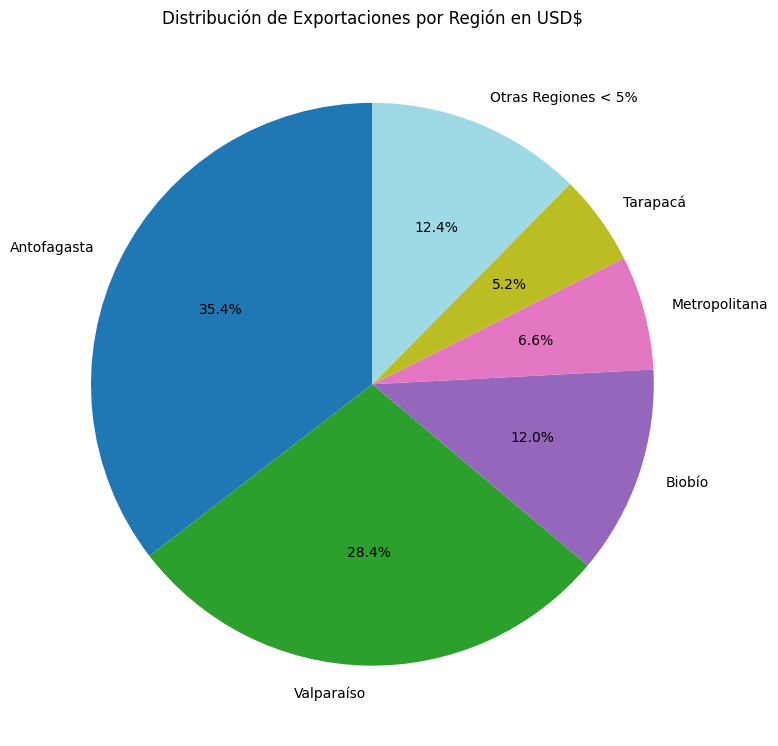

In [31]:
# 31. Distribución de Exportaciones por Región (USD$)

exportaciones_por_region = df_exp.groupby('region')['monto_fob_usd'].sum()

exportaciones_por_region = exportaciones_por_region.sort_values(ascending=False)

print(exportaciones_por_region)

porcentajes = exportaciones_por_region / exportaciones_por_region.sum() * 100

menor_a_5porc = porcentajes < 5

otras_regiones = exportaciones_por_region[menor_a_5porc].sum()

exportaciones_por_region_filtrada = exportaciones_por_region[~menor_a_5porc]

exportaciones_por_region_filtrada['Otras Regiones < 5%'] = otras_regiones

plt.figure(figsize=(8, 8))
ax = exportaciones_por_region_filtrada.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='tab20')

plt.title('Distribución de Exportaciones por Región en USD$')
plt.ylabel('')  # Eliminar la etiqueta en el eje Y
plt.tight_layout()

# Mostrar el gráfico
plt.show()

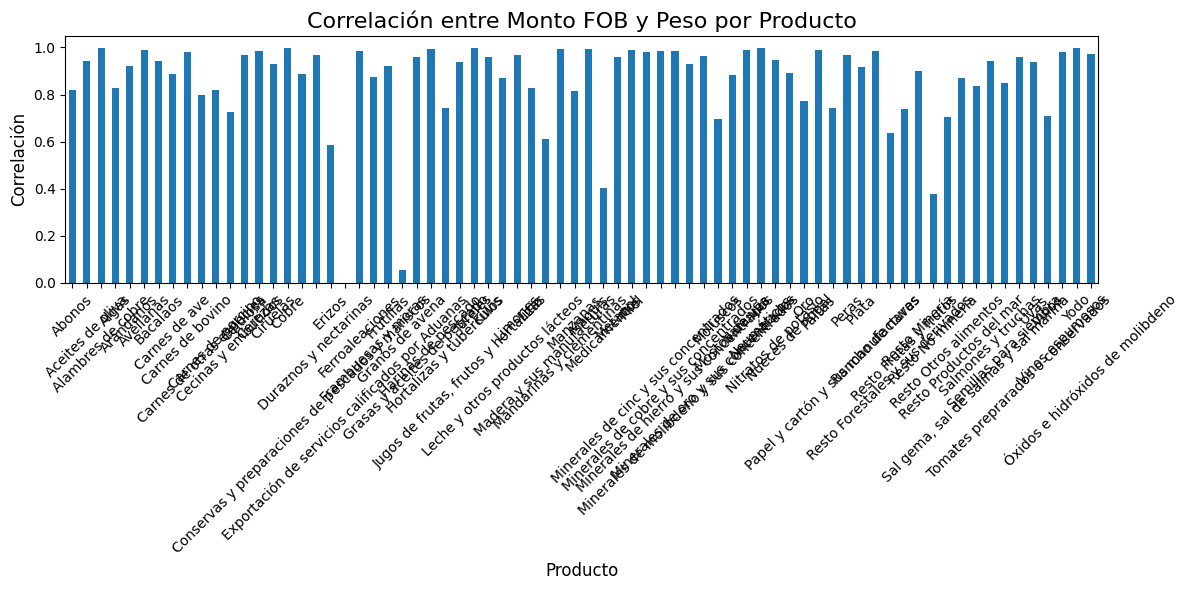

In [32]:
# 34. Correlación entre Monto FOB y Peso por Producto
# Eliminar filas con valores nulos en las columnas relevantes
df_exp = df_exp.dropna(subset=['monto_fob_usd', 'peso_en_toneladas'])

# Función para calcular la correlación de forma segura
def calcular_correlacion(x):
    # Comprobar si alguna de las columnas tiene desviación estándar cero
    if x['monto_fob_usd'].std() == 0 or x['peso_en_toneladas'].std() == 0:
        return float('nan')  # Si la desviación estándar es cero, retornar NaN
    else:
        return x['monto_fob_usd'].corr(x['peso_en_toneladas'])

# Calcular la correlación entre monto_fob_usd y peso_en_toneladas por producto
correlacion_peso_precio = df_exp.groupby('producto')[['monto_fob_usd', 'peso_en_toneladas']].apply(calcular_correlacion)

# Crear el gráfico de barras para visualizar las correlaciones
plt.figure(figsize=(12, 6))
correlacion_peso_precio.plot(kind='bar')

# Configurar el título y las etiquetas
plt.title('Correlación entre Monto FOB y Peso por Producto', fontsize=16)
plt.xlabel('Producto', fontsize=12)
plt.ylabel('Correlación', fontsize=12)
plt.xticks(rotation=45)

# Ajustar la visualización y mostrar la gráfica
plt.tight_layout()
plt.show()

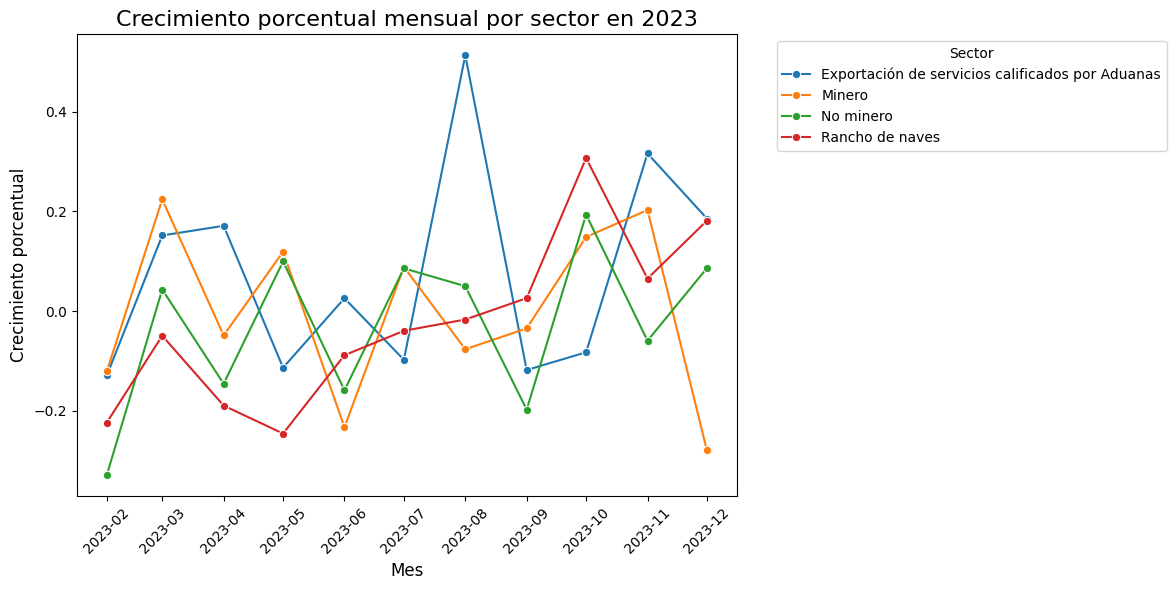

In [33]:
# Crecimiento Mensual de las Exportaciones por Sector en 2023

df_exp['mes_num'] = df_exp['mes'].str.capitalize().map(lambda x: orden_meses.index(x) + 1)

# Agrupar los datos por año, mes y sector, sumando los valores de 'monto_fob_usd'
df_monthly = df_exp.groupby(['año', 'mes_num', 'sector'])['monto_fob_usd'].sum().reset_index()

# Crear la columna de fecha utilizando mes_num y año
df_monthly['fecha'] = pd.to_datetime(df_monthly['año'].astype(str) + '-' + df_monthly['mes_num'].astype(str) + '-01')

df_monthly = df_monthly.sort_values(['fecha'])

# Calcular el crecimiento porcentual por sector
df_monthly['crecimiento_pct'] = df_monthly.groupby('sector')['monto_fob_usd'].pct_change()

df_monthly = df_monthly.dropna(subset=['crecimiento_pct'])

# Crear la gráfica de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_monthly, x='fecha', y='crecimiento_pct', hue='sector', marker='o')

plt.title('Crecimiento porcentual mensual por sector en 2023', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Crecimiento porcentual', fontsize=12)
plt.xticks(rotation=45)

plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()


In [34]:
#Top 10 Países Destino con Mayor Importación por Puerto de Embarque

df_importaciones_por_puerto_pais = df_exp.groupby(['puerto_embarque', 'pais_destino'])['monto_fob_usd'].sum().reset_index()

df_importaciones_por_puerto_pais = df_importaciones_por_puerto_pais.sort_values(by=['puerto_embarque', 'monto_fob_usd'], ascending=[True, False])

top_10_paises_por_puerto = df_importaciones_por_puerto_pais.groupby('puerto_embarque').head(10)

print(top_10_paises_por_puerto)

               puerto_embarque               pais_destino  monto_fob_usd
50    Aerop. A. Merino Benítez  Estados Unidos de América   3.139182e+09
149   Aerop. A. Merino Benítez                      Suiza   6.998673e+08
120   Aerop. A. Merino Benítez                      Otros   4.848904e+08
31    Aerop. A. Merino Benítez                     Canadá   4.104725e+08
33    Aerop. A. Merino Benítez                      China   3.825791e+08
...                        ...                        ...            ...
1387                  Ventanas                     España   6.322559e+07
1389                  Ventanas                      Japón   3.551704e+07
1384                  Ventanas                   Alemania   1.171340e+07
1391                  Ventanas       República Dominicana   9.897687e+06
1390                  Ventanas                      Otros   5.854224e+05

[359 rows x 3 columns]


In [35]:
#Top 50 Exportaciones por Producto, Puerto de Embarque y País Destino

df_exportaciones_por_producto_puerto_pais = df_exp.groupby(['producto', 'puerto_embarque', 'pais_destino'])['monto_fob_usd'].sum().reset_index()

df_exportaciones_por_producto_puerto_pais_sorted = df_exportaciones_por_producto_puerto_pais.sort_values(by='monto_fob_usd', ascending=False)

top_50_exportaciones_puerto_pais = df_exportaciones_por_producto_puerto_pais_sorted.head(50)

print(top_50_exportaciones_puerto_pais)

                                              producto  \
3792             Minerales de cobre y sus concentrados   
1242                                             Cobre   
1244                                             Cobre   
3813             Minerales de cobre y sus concentrados   
3075                                             Litio   
3844             Minerales de cobre y sus concentrados   
3818             Minerales de cobre y sus concentrados   
6581                                Salmones y truchas   
3076                                             Litio   
3809             Minerales de cobre y sus concentrados   
1263                                             Cobre   
3837             Minerales de cobre y sus concentrados   
3788             Minerales de cobre y sus concentrados   
771                                           Celulosa   
927                                            Cerezas   
963                                            Cerezas   
1292          

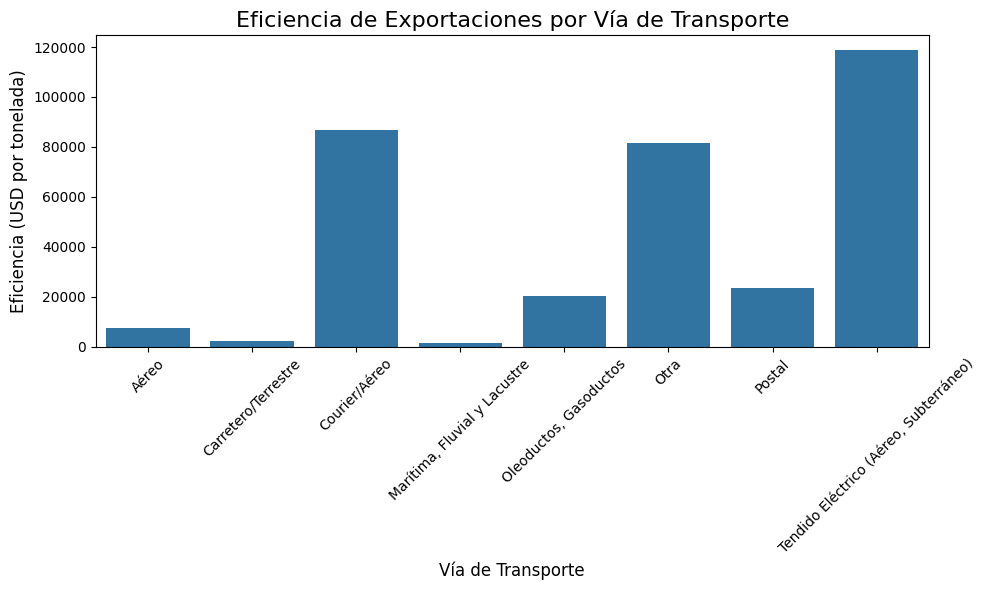

In [36]:
#Análisis de Desempeño por Vía de Transporte

transporte_desempeño = df_exp.groupby('via_transporte').agg({
    'monto_fob_usd': 'sum',
    'peso_en_toneladas': 'sum'
})
transporte_desempeño['eficiencia'] = transporte_desempeño['monto_fob_usd'] / transporte_desempeño['peso_en_toneladas']

# Crear la gráfica de barras para mostrar la eficiencia de cada vía de transporte
plt.figure(figsize=(10, 6))
sns.barplot(x=transporte_desempeño.index, y=transporte_desempeño['eficiencia'])

# Configurar el título y las etiquetas
plt.title('Eficiencia de Exportaciones por Vía de Transporte', fontsize=16)
plt.xlabel('Vía de Transporte', fontsize=12)
plt.ylabel('Eficiencia (USD por tonelada)', fontsize=12)
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()
plt.show()